<a href="https://colab.research.google.com/github/ColeTKrause/MAT421/blob/main/ModuleH_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations Part 2
### References

**Chapter 22: Python Numerical Methods** \
https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html

## Numerical Error and Instability
### Section 22.4

Error and Instability is an issue that is inherent to all computational analysis. Thus it is important for engineers, scientist, and mathematicians to understand how to mitigate error and develop stable models. The various methods and models used for analytics in previous sections have proven to be powerful tools, but they don't apply to every single problem. Engineers, scientist, and mathematicians must be able to analyze a problem and determine which method and model will provide the best results. These decisions are decided by the constrains of the problem and the environment in which they are deployed. When considering the correct method and module to use computational power, necessary level of accuracy, stability, and speed are very important variables to consider. We define **accuracy** as the model's ability to reduce error and approach the exact solution. We define **stability** as the model's ability to keep error under control and not grow throughout computation. \
\
For example, consider the case of an engineering team designing automatic collision detection and breaking for a car when it encouters an obstacle. The key considerations for this environment is stability, speed, and keeping computational power within bounds. The internal computer is limited to power provided by the battery and does not have the computational power of a high end desktop computer. The accuracy of the computation is important, however; it does not need to be able to compute distances, velocity, and acceleration down to the nano meeter, but rather it must be accurate down to roughly ten centimeters. The car's computer must be able to detect an obstacle and engage the breaks in the milliseconds, so the speed of computation needs to be very quick. The car's collision system must be able to finish computation in enough time to be able to engage the breaks. Lastly the model needs to be very stable, as it could be disasterous if the breaks are accidentally engaged causing a rear-end collision when no threat was detected. Putting all of this information together, the engineering team should consider the model that is the most stable and fast down to the millisecond. The model is likely to lack ultra high accuracy results, but the team is willing to accept this trade off considering a simpler model will require less computation. So a model worth considering is the Implicit Euler Formula as it provides good enough accuracy for the problem, while being very quick to calculate and stable. \
\
**Example:** Observe the accuracy of the Euler Explicit, Euler Implicit, and Trapezoidal formula. The problem is the pendulum equation over the time interval $[0,7]$ in stepsizes of $h=0.1$, starting condition $S_0[1,0]$, and $ω=\sqrt{\frac{g}{l}}=7$.

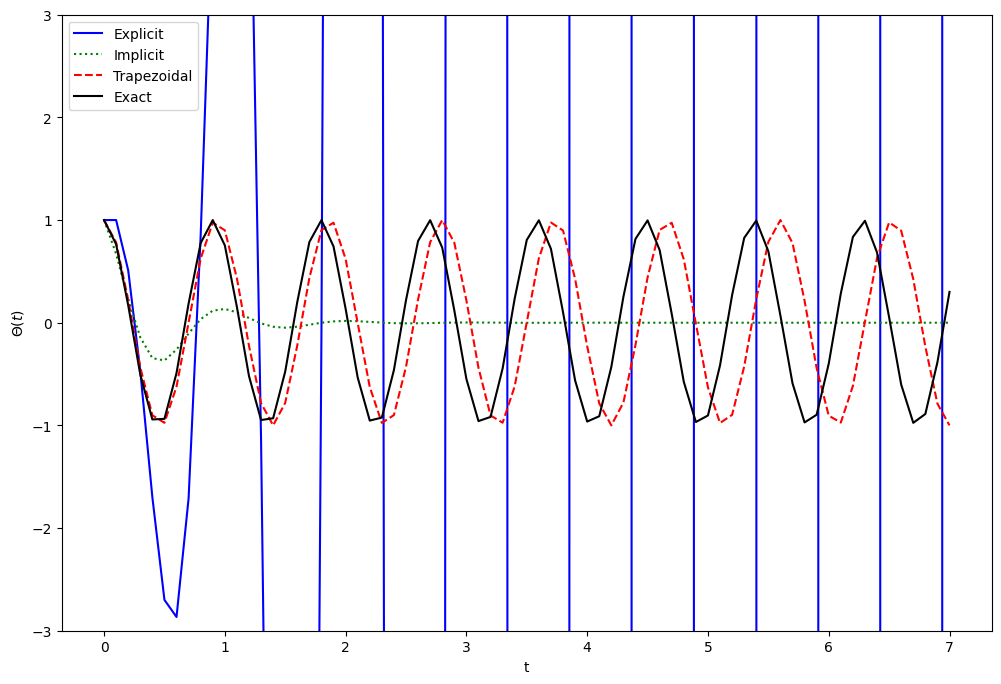

In [4]:
# necessary library imports
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Model Parameters
h = 0.1 # step size
t = np.arange(0,7.1,h)
w = 7
S0 = np.array([[1],[0]])

# ODEs
m_e = np.array([[1,h],
                [-w**2*h,1]])
m_i = inv(np.array([[1,h],
                [-w**2*h,1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
                           [w**2*h/2,1]])),
             np.array([[1,h/2],
                       [-w**2*h/2,1]]))
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# Integrate the above
s_e[0, :] = S0.T
s_i[0, :] = S0.T
s_t[0, :] = S0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**Notice:** Observe how even for the most accurate model (Trapezoidal), the error grows over time. Observe how the Explicit Euler function error grows out of contral after a few seconds, indicating the model is highly unstable for this problem. Lastly, observe how the Implicit Euler function decays, indicating a low accuracy but highly stable model for the problem.

## Predictor-Corrector and The Runge Kutta Methods
### Section 22.5

**Predictor-Corrector** are a set of two formulas **predictor** and **corrector** with the goal of improving the approximationg accuracy given the intial value problem. For notation, $F(t,S(t))$ represents the intial value function state and returns the change of state $\frac{dS(t)}{dt}$. The goal is to improve accuracy of $F(t,S(t))$ by proding the function multiple times are different locations, and taking the weighted average allowing the program to update the state. \
\
The **Midpoint method** has the below predictor step: \
$S(t_j+\frac{h}{2})=S(t_j)+\frac{h}{2}F(t_j,S(t_j))$\
as assumed by the name midpoint, this provides the halfway point between $t_j$ and $t_{j+1}$\
\
The associated corrector step is then: \
$S(t_{j+1})=S(t_j)+hF(t_j+\frac{h}{2},S(t_j+\frac{h}{2}))$ \
This computes the solution at $S(t_{j+1})$ from $S(t_j)$ but using the derivative from the state $S(t_j+\frac{h}{2})$\
\
**Runge Kutta Methods** are one of the most common methods for solving ODEs. For a given approximation method, the accuracy can be improved by including more terms from the Taylor series. However, this approach can be very computationaly expensive requiring more derived state expressions. The pivotal idea behind Runge Kutta is to add more terms but by using a truncated Taylor series, which saves the steps associated with computing the additional derived state expressions: $S''(t_j),...,S^{(n)}(t_j)$ with $n$ representing the highest level desired derivative. \
\
**Second Order Runge Kutta Method Breakdown**\
Assume $\frac{dS(t)}{dt}=F(t,S(t))$, the integration is as follows: \
$S(t+h)=S(t)+c_1F(t,S(t))h+c_2F[t+ph,S(t)+qhF(t,S(t))]h$\
\
The parameters $c_1,c_2,p,q$ match to the second-order taylor series, resulting in:\
$S(t+h)=S(t)+S'(t)h+\frac{1}{2!}S''(t)h^2=S(t)+F(t,S(t))h+\frac{1}{2!}F'(t,S(t))h^2$\
\
Applying partial derivatives and applying Taylor series in several variables to the last term yields:\
$S(t+h)=S+(c_1+c_2)Fh+c_1[\frac{∂F}{∂t}p+q\frac{∂F}{∂S}]h^2$\
\
This is a very important discovery as comparing the above equations yeilds:\
$c_1+c_2=1,c_2p=\frac{1}{2},c_2q=\frac{1}{2}$ \
This means assigning a value to one of the parameters, the rest can be determined! \
We can simple the equation further by defining the following: \
$k_1=F(t_j,S(t_j))$ \
$k_2=F(t_j+ph,S(t_j)+qhk_1)$ \
\
Yield a simple to read and implement equation: \
$S(t_{j+1})=S(t_j)+\frac{1}{2}(k_1+k_2)h$ \
\
**Fourth-order Runge Kutta Breakdown** \
Using the above information provided in the second-order Runge Kutta, the same approach can be used for a fourth-order Runge Kutta method. The method assumes the defines four points this time, and the weighted average is used for approximating the solution. It is defined as follows: \
$k_1=F(t_j,S(t_j))$ \
\
$k_2=F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h)$\
\
$k_3=F(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h)$ \
\
$k_4=F(t_j+h,S(t_j)+k_3h)$\
\
Resulting in the following equation:\
$S(t_{j+1})=S(t_j)+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$ \
\
Increasing the terms then brings a fourth-order accuracy, $O(h^4)$
